In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IP/Project/jsbach_chorals_harmony.data')

In [4]:
Y = data['Chord label']
Y.shape

(5665,)

In [5]:
X = data.drop('Chord label', axis=1)
X.head()

,Choral ID,Event number,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2


In [6]:
X.drop(['Choral ID', 'Event number'], axis=1, inplace=True)

In [7]:
X.head()

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter
0,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
1,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5
2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2
3,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2


In [8]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=42, shuffle=True)

In [10]:
ordinalEnc = OrdinalEncoder()
ordinalEnc.fit(X_train)
ordinalEnc.categories_

[array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['NO', 'YES'], dtype=object),
 array(['A', 'A#', 'Ab', 'B', 'Bb', 'C', 'C#', 'D', 'D#', 'Db', 'E', 'Eb',
        'F', 'F#', 'G', 'G#'], dtype=object),
 array([1, 2, 3, 4, 5])]

In [11]:
X_train_transform = ordinalEnc.transform(X_train)
X_test_transform = ordinalEnc.transform(X_test)

In [12]:
paramGrid = {
    'alpha' : [1**x for x in range(-10,0)],
    'force_alpha' : [True, False]
    }

In [13]:
searchModel = GridSearchCV(estimator=CategoricalNB(), param_grid=paramGrid, cv=5, scoring='accuracy')

In [14]:
searchModel.fit(X_train_transform,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
                                   1.0],
                         'force_alpha': [True, False]},
             scoring='accuracy')

In [15]:
searchModel.best_score_

0.7128095337074759

In [16]:
y_train_predicted = searchModel.best_estimator_.predict(X_train_transform)
y_test_predicted = searchModel.best_estimator_.predict(X_test_transform)

In [17]:
searchModel.best_params_

{'alpha': 1.0, 'force_alpha': True}

In [18]:
train_acc_score = accuracy_score(y_train, y_train_predicted)
train_acc_score

0.7335216572504708

In [19]:
test_acc_score = accuracy_score(y_test, y_test_predicted)
test_acc_score

0.6951305575158786

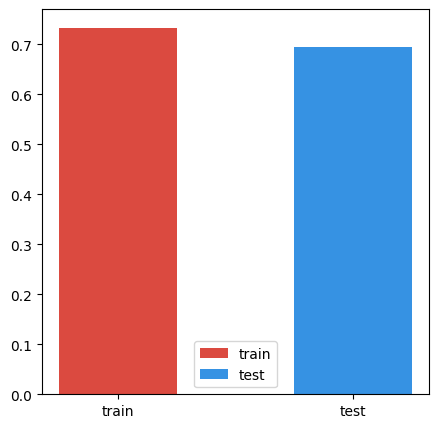

In [20]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5,5))
plt.bar('train', train_acc_score, color='#db4a40', width=0.5, label='train',)
plt.bar('test', test_acc_score, color='#3692e3', width=0.5, label='test')
plt.legend()
plt.show()

In [21]:
from sklearn.naive_bayes import BernoulliNB

In [22]:
bernouliSearchModel = GridSearchCV(BernoulliNB(), param_grid=paramGrid, cv=5, scoring='accuracy')

In [23]:
bernouliSearchModel.fit(X_train_transform, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
                                   1.0],
                         'force_alpha': [True, False]},
             scoring='accuracy')

In [24]:
bernouliSearchModel.best_score_

0.6847981708584494

In [25]:
y_train_predicted = bernouliSearchModel.best_estimator_.predict(X_train_transform)
y_test_predicted = bernouliSearchModel.best_estimator_.predict(X_test_transform)

In [26]:
bernouli_train_acc_score = accuracy_score(y_train, y_train_predicted)
bernouli_train_acc_score

0.6989171374764596

In [27]:
bernouli_test_acc_score = accuracy_score(y_test, y_test_predicted)
bernouli_test_acc_score

0.671136203246295

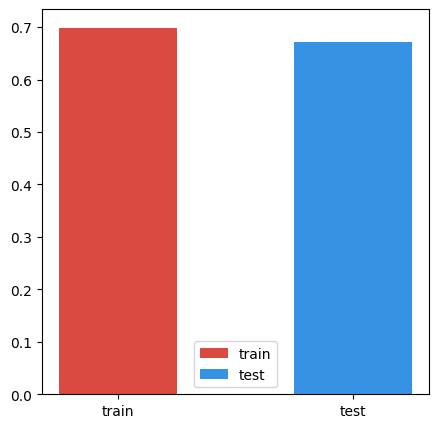

In [28]:
plt.figure(figsize=(5,5))
plt.bar('train', bernouli_train_acc_score, color='#db4a40', width=0.5, label='train',)
plt.bar('test', bernouli_test_acc_score, color='#3692e3', width=0.5, label='test')
plt.legend()
plt.show()

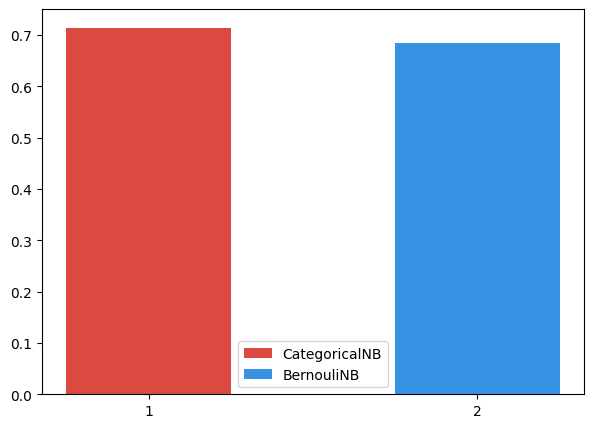

In [29]:
plt.figure(figsize=(7,5))
plt.bar('1', np.average([train_acc_score, test_acc_score]), color='#db4a40', width=0.5, label='CategoricalNB',)
plt.bar('2', np.average([bernouli_train_acc_score, bernouli_test_acc_score]), color='#3692e3', width=0.5, label='BernouliNB',)

plt.legend()
plt.show()

In [30]:
import pickle
import os

currDirPath = "./drive/MyDrive/Colab Notebooks/IP/Project/ModelsExport/Classification"

models = [searchModel.best_estimator_, bernouliSearchModel.best_estimator_]
names = ['CategoricalNaiveBayes.pkl', 'BernouliNaiveBayes.pkl']
for model, name in zip(models, names):
  try:
    with open(os.path.join(currDirPath,name),'wb') as file:
      pickle.dump(model,file)
  except IOError as err:
    print('Error while exporting model \'{}\''.format(name.split('.')[0]))
    print(err)